# Некоторые виды часто используемых распределений и их свойства

*Подготовил Ян Пиле*

Вернемся немного к теории вероятностей. Представим, что у нас есть непрерывная случайная величина X, которая подчиняется некоторому закону. Когда мы с вами строили гистрограммы, наши распределения были построены по ограниченным выборкам. Давайте представим, что мы взяли бесконечную выборку нашей величины Х, построили ее гистограмму, а потом каждый стобик гистограммы разделили на сумму всех столбиков. Нетрудно понять, что теперь, если сложить все столбики, получится 1. Такой процесс называется нормировкой. Если на нашей уже нормированной гистограмме столбиков станет бесконечное число, граница этих столбиков будет как бы непрерывной функцией. Эту функцию называют функцией **плотности вероятности**, обозначим ее за $\rho$. Чтобы подсчитать вероятность того, что случайная величина x попадет в отрезок от *a* до *b*, нужно сосчитать такой интеграл:
$$P(x\in[a,b])=\int_a^b\rho(x)dx$$

Функцией **распределения вероятности** или просто **функцией распределения** называют функцию:
$$F(x)=P(X\le x) = \int_{-\infty}^x\rho(y)dy$$

Равную вероятности того, что случайная величина принимает значение, меньшее или равное $x$.

Проблема в том, что для непрерывной случайной величины вероятность каждого конкретного значения равна нулю (потому что ширина столбика на гистограмме = 0), но нас это волновать будет не слишком сильно, потому что с бесконечными выборками мы работать не можем :)

Как вы понимаете, плотность вероятности должна быть отнормирована таким образом, чтобы интеграл по всем возможным допустимым значениям x был равен 1, то есть вероятность того, что случайная величина попадет в свою область определения = 1 :) (это мы как будто взяли и просуммировали все возможные столбики)

## Нормальное распределение

Нормальное распределение – распределение с плотностью вида:
$$\rho(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Иногда пишут, что это распределение $N(\mu,\sigma^2)$

Параметрами распределения являются $\mu$ и $\sigma$ - его среднее (оно же - мат.ожидание) и стандартное отклонение. На графике ниже приведено стандартное нормальное распределение ( то есть нормальное распределение с $\mu=0$ и $\sigma=1$ :

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Standard_deviation_diagram_%28decimal_comma%29.svg/325px-Standard_deviation_diagram_%28decimal_comma%29.svg.png" width="500">

Мы сразу видим, что распределение симметричное относительно своего среднего и унимодальное(одна мода :)). Более того - из этой симметрии следует, что среднее, медиана и мода здесь совпадают :)

А еще по такому распределению видно, что отклонения от среднего влево и вправо равновероятны. На самом деле, в реальной жизни очень многие объекты распределены нормально, поэтому нам придется ознакомиться с этим распределением поподробнее :)

На графике сверху нарисованы какие-то проценты. Это продукты жизнедеятельности так называемого "правила трех сигм". Оно означает, что для нормального распределения:
* ~68% значений лежат в пределах одного стандартного отклонения от среднего
* ~95% значений лежат в пределах двух стандартных отклонений от среднего
* ~99% значений лежат в пределах трех стандартных отклонений от среднего

Эту штуку не так трудно доказать. Для этого надо взять интеграл от нашей плотности стандартного нормального распределения (подсчитать площадь под кривой) от $-\sigma$ до $\sigma$, например:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
n = 100000
xy = np.random.uniform(-1, 1, size = (n, 2))

In [19]:
((xy**2).sum(axis = 1)<1).mean()*4

3.13352

In [21]:
x = np.random.normal(1, 2, size = (10000))
y = np.random.normal(2, 1.5, size = (10000))

In [33]:
(x*3).var()

35.748995745534145

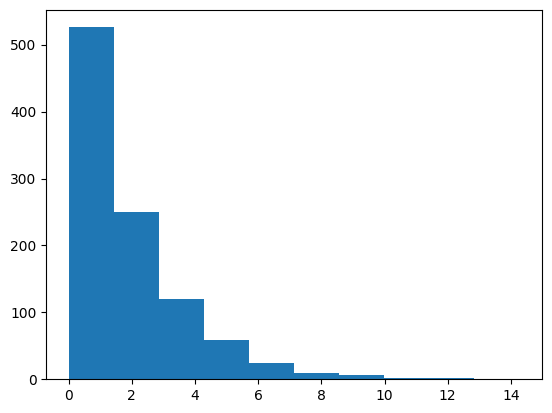

In [36]:
_ = plt.hist(np.random.exponential(2, size = 1000))

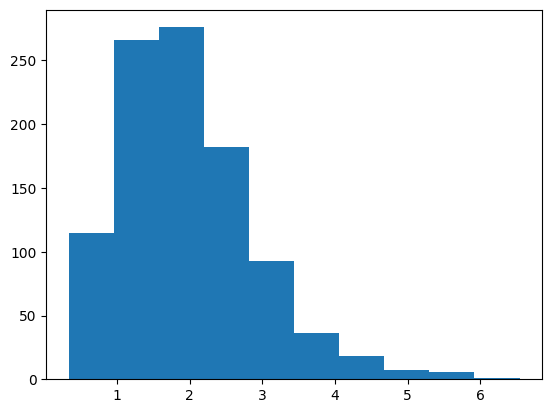

In [40]:
_ = plt.hist(np.random.exponential(2, size = (5,1000)).mean(axis = 0))

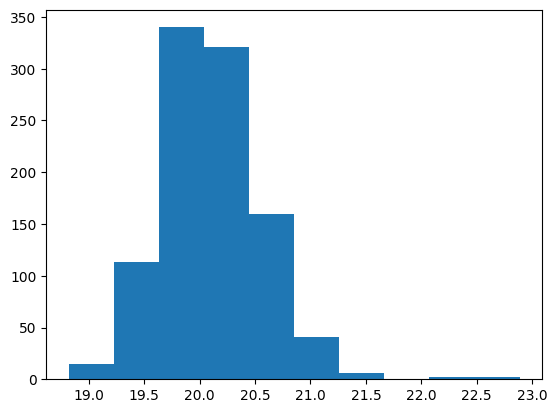

In [52]:
_ = plt.hist(np.random.lognormal(1,2,size = (100000,1000)).mean(axis = 0))

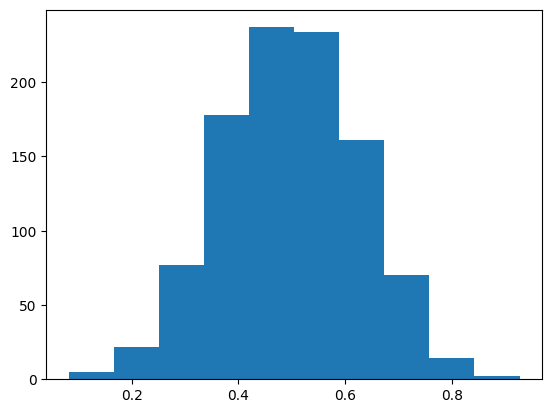

In [41]:
_ = plt.hist(np.random.uniform(size = (5,1000)).mean(axis = 0))

In [26]:
x = np.array([[2,3], [2,2], [3,4]])

In [30]:
x.mean(axis = 0), x.mean(axis = 1) 

(array([2.33333333, 3.        ]), array([2.5, 2. , 3.5]))

In [1]:
from math import pi, exp
from scipy.integrate import quad

def std_norm(x):
    return (1/((2*pi)**0.5)) * exp(-x**2/2)

print('Интеграл от -2*sigma до 2*sigma:',quad(std_norm,-2, 2)[0])

Интеграл от -2*sigma до 2*sigma: 0.9544997361036417


In [2]:
import numpy as np
import matplotlib.pyplot as plt

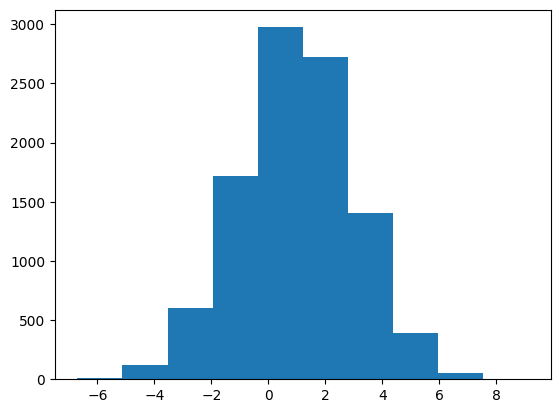

In [3]:
_ = plt.hist(np.random.normal(1,2,size = 10000))

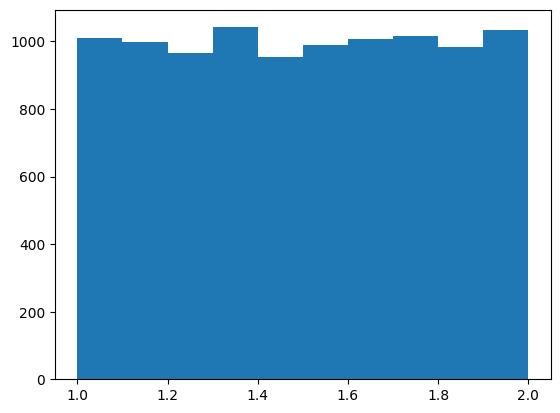

In [4]:
_ = plt.hist(np.random.uniform(1,2,size = 10000))

Более того – теперь мы, по сути, можем посчитать вероятность того, что отклонение от среднего какой-то нормально распределенной величины x будет больше, чем y. Для этого надо просто взять и подсчитать соответствующий кусок площади под кривой.

## Центральная предельная теорема

Это довольно фундаментальное утверждение в неформальном виде прозвучит так:

Пусть у нас есть n (n должно быть достаточно большим числом) независимых одинаково распределенных случайных величин (почти не важно как распределенных):  $X_1...X_n$
Пусть каждая из этих величин имеет конечные среднее $\mu$ и стандартное отклонение $\sigma$. Обозначим сумму значений этих величин за $S_n = X_1+X_2+...+X_n$. Тогда величина:

$$\sqrt{n}\frac{S_n-\mu n}{\sigma} \rightarrow N(0,1)$$

Иначе говоря, сумма n независимых случайно распределенных величин распределена похоже на нормальное распределение с параметрами $ N(\mu n,\frac{\sigma^2}{n})$ 

Это одна из причин, почему нормальное распределение довольно часто встречается в природе( нам часто приходится работать с суммами одинаково распределенных случайных величин)

Если вернуться к статистике, можно представить это так. Пусть  наша генеральная совокупность как-то распределена(например нормально). Давайте случайно извлечем 100 выборок из этого распределения и в каждой из них подсчитаем среднее значение (это будут наши величины $X_n$), а потом рассмотрим распределение этих выборочных средних. Оно получится нормальным! И более того - будет очень близко к истинному среднему генеральной совокупности.

In [7]:
import numpy as np
from numpy.random import normal, lognormal, uniform, exponential
from matplotlib.pyplot import hist, subplots
import matplotlib.pyplot as plt


In [8]:
lognormal(1,2, size = (10000,1000)).mean(axis = 1).shape

(10000,)

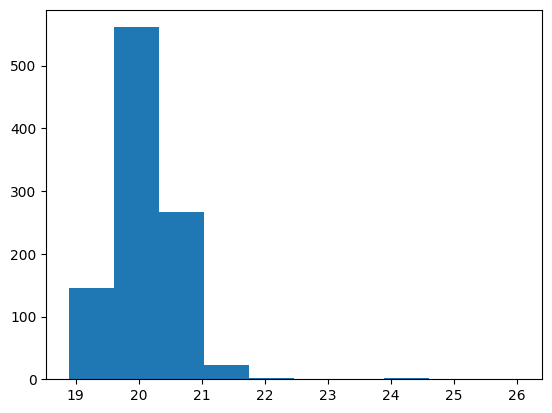

In [16]:
_ = plt.hist(lognormal(1,2, size = (100000,1000)).mean(axis = 0))

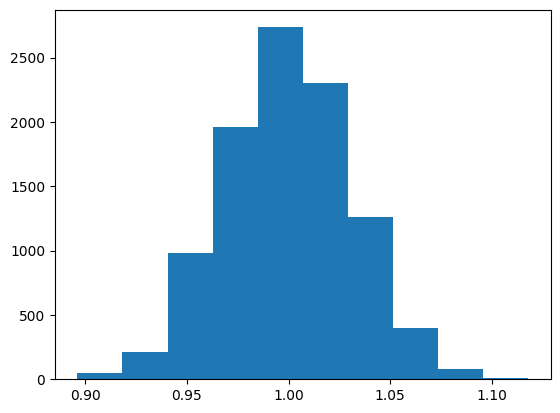

In [10]:
_ = plt.hist(exponential( size = (10000, 1000)).mean(axis = 1))

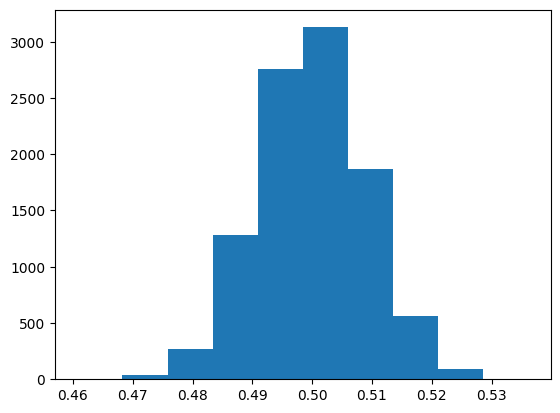

In [11]:
_ = plt.hist(uniform(size = (10000,1000)).mean(axis = 1))

Очень близко! Но видно, что для маленьких выборок выборочные средние имеют некоторый разброс (есть выборки со средним 1.7). Посмотрим, от чего это зависит. Давайте будем брать выборки по 2000 наблюдений?

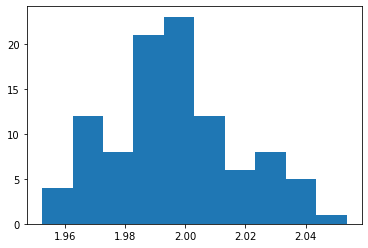

In [101]:
x = [np.mean([normal(2,1) for _ in range(2000)]) for _ in range(100)]
h = hist(x)

Стало ближе! Распределение средних стало совсем узким(это хорошо). теперь отличие в третьем знаке после запятой :). Да и само распределение средних уже явно похоже на нормальное.

In [20]:
np.mean(x)

1.9991414772949605

А еще можно попробовать подкрутить количество выборок:

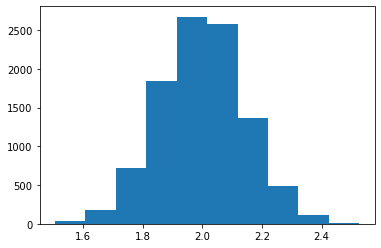

In [102]:
x = [np.mean([normal(2,1) for _ in range(50)]) for _ in range(10000)]
h = hist(x)

На 10000 выборок по 50 наблюдений мы тоже получаем хороший результат. Отличие от истинного значения снова в 3 знаке после запятой.

In [22]:
np.mean(x)

1.9984054127255844

Переформулируем нашу ЦПТ для выборок, которые мы извлекали. Пусть есть некоторое распределение с заданными средним и дисперсией. Если извлечь из него N случайных выборок и по каждой из них посчитать выборочное среднее $\bar{X_i}$, то эти средние будут иметь нормальное распределение, а среднее значение выборочных средних будет близко к среднему значению генеральной совокупности. Обычно тут говорят, что исходное распределение не должно быть слишком скошено (то есть его плотность должна выглядеть более-менее симметрично), но при очень больших n ЦПТ выполняется и для скошенных распределений. 

В качестве примера скошенного распределения модно взять экспоненциальное распределение. Это распределение с плотностью:
$\rho(x)=\lambda e^{-\lambda x}$ при $x\ge0$ и $\rho(x)=0$ при $x<0$

На графике ниже мы взяли $\lambda = 1$

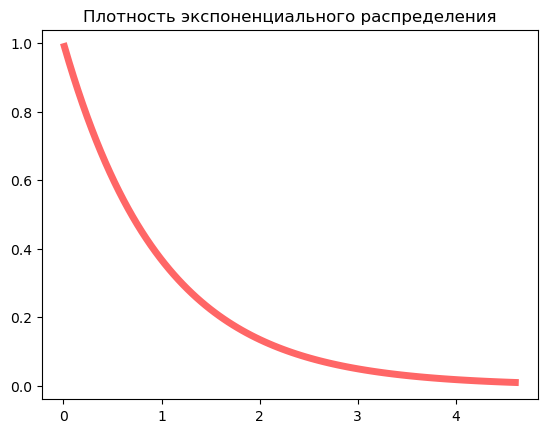

In [22]:
from scipy.stats import expon
fig, ax = plt.subplots(1, 1)

x = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100)
f = ax.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
f = ax.set_title('Плотность экспоненциального распределения')

$\rho(x)=e^{-x}$ при $x\ge0$ и $\rho(x)=0$ при $x<0$

Нетрудно убедиться, что среднее значение(мат.ожидание) такого распределения = 1
В теории вероятностей это считается как:
$E(x) = \int_{-\infty}^{+\infty}x\rho(x)dx = \int_{0}^{+\infty}xe^{-x}dx$

In [186]:
def exponential_ev(x):
    return x * exp(-x)

print('Математическое ожидание экспоненциального распределения:',quad(exponential_ev,0, np.inf)[0])

Математическое ожидание экспоненциального распределения: 0.9999999999999998


Ну и давайте оценим ту же штуку с помощью ЦПТ

In [10]:
from numpy.random import exponential

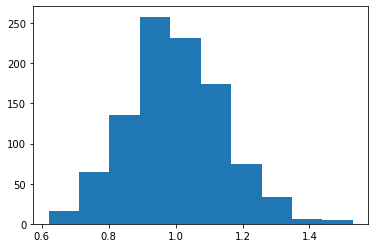

In [188]:
x = [np.mean([exponential(1) for _ in range(50)]) for _ in range(1000)]
h = hist(x)

In [ ]:
import numpy as np

np.random.

Как видно, распределение очень похоже на нормальное, а его среднее - как раз оценка нашего исходного среднего

In [189]:
np.mean([np.mean([exponential(1) for _ in range(10)]) for _ in range(1000)])

1.0076428578975325

### Важное замечание о применении ЦПТ

Когда мы строим нормальное приближение для суммы n случайных величин, мы в качестве оценки $\sigma$ генеральной совокупности используем выборочное стандартное отклонение $\sigma$. Такая замена разумна, когда выборка имеет достаточно большое кол-во элементов, скажем, больше 30. Но:

* Вы можете самостоятельно найти это число путем экспериментов
* Обычно, когда мы будем работать с выборками, они будут сильно больше 30 наблюдений.
* Если исхожное распределение скошено(сильно несимметрично), то для хорошей нормальной аппроксимации понадобится большая выборка

## Бета-распределение

До сих пор в определении наших распределений не встречалось никаких малоприятных символов, настало время это исправить. Представьте, что вам нужно моделировать событие, область определения которого от 0 до 1, например CTR баннера (количество кликов на количество показов), как бы вы стали его моделировать? 
Представим, что у вас есть выборка из 1000 человек. Каждому из них вы показываете свой рекламный баннер и сколько-то из людей в этот баннер кликает. Кажется, что вероятность клика можно оценить как в испытаниях Бернулли (количество успехов делить на количество не-успехов). Но люди-то разные. Индивидуальная вероятность кликнуть в ваш баннер у них наверняка разнится. И если бы в мультивселенной мы провели много-много аналогичных испытаний с баннерами и теми же самыми людьми, у каждого человека появилось бы какое-то распределение вероятностей кликов :) Примерно это и делает Бета-распределение. Выглядит оно так:

$$\rho(p) = \dfrac{1}{Beta(\alpha,\beta)}p^{\alpha-1}(1-p)^{\beta-1}$$

При этом:
$$Beta(\alpha,\beta) = \dfrac{Г(\alpha)Г(\beta)}{Г(\alpha+\beta)}$$

А гамма-функция - некое непрерывное обобщение факториала:
$$Г(n+1) = n!$$

На самом деле, множитель со специальными функциями нужен просто для нормировки (чтобы интеграл от плотности распределения давал 1). Содержательная часть связана с $p$. Заметьте, что это очень похоже на то, что мы видели в биномиальном распределении. И смысл примерно такой:

$\alpha-1$ можно воспринимать как число успехов в выборке, а $\beta-1$ - как число не-успехов. То есть с увеличением числа успехов в вашей выборке, ваша оценка вероятности успеха должна съезжать ближе к 1 (то есть вправо), а с ростом числа не-успехов - влево (то есть к нулю). Скажем, если в вашей выборке 1000 наблюдений и из них 900 успехов, то $\alpha-1 = 900$, а $\beta-1=100$

In [17]:
from scipy.stats import beta

beta_sample = beta(3-1, 201-1).rvs(1000)

In [19]:
import seaborn as sns

/var/folders/62/5kgnrj396cv9s3jb1nr9_mj40000gn/T/ipykernel_91350/3447651991.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(beta_sample, kde=False)


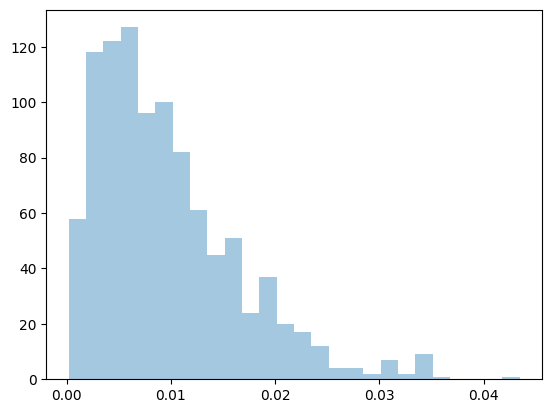

In [21]:
_ = sns.distplot(beta_sample, kde=False)

## Логнормальное распределение

Еще одно распределение, которое нам с вами пригодится - логнормальное. Говорят, что переменная $X$ имеет логнормальное распределение, если ее логарифм распределен нормально :) Можете проверить, что плотность такого распределения будет иметь вид:

$$\rho(x) = \dfrac{1}{\sigma x\sqrt{2\pi}}e^{-(lnx-\mu)^2/2\sigma^2}$$

Как следует из определения, логнормальную выборку можно сгенерировать довольно простым образом:

In [22]:
from scipy.stats import norm
mu = 0
sigma = 1
lognorm = np.exp(norm(mu, sigma).rvs(1000))

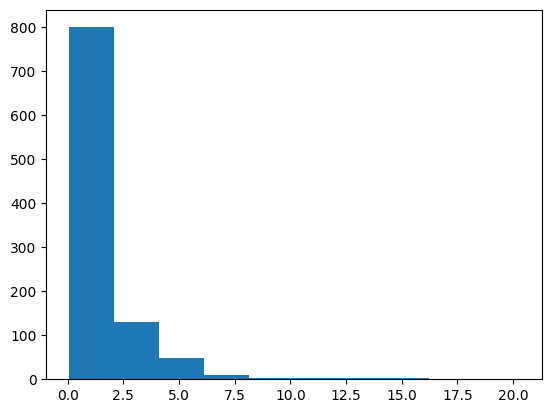

In [23]:
h = hist(lognorm)

Как видите, это распределение оказалось скошенным влево (оно ОЧЕНЬ скошено в лево в нашем примере). Рекомендую поиграть с параметрами и разобраться, за что каждый из них отвечает. Возникает законный вопрос: где я такое распределение могу встретить?

## Закон Бенфорда

Закон Бенфорда - эмпирическое утверждение о том, что многие наборы данных (как состряпанные человеком, так и результаты измерений явлений природы) содержат намного больше чисел, начинающихся с цифры 1, чем с любой другой цифры. Если быть чуть точнее - примерно 30% всех таких чисел начинается с единицы. Вероятность встретить в первом разряде двойку уже меньше и так далее вплоть до 9, на долю которой приходится около 5% чисел. Не совсем понятно, откуда такая зависимость взялась.

Объяснение заключается в том, что огромное количество количество величин является произведениями n +- одинаково распределенных положительных случайных величин (немного напоминает ЦПТ по формулировке). И такие произведения при большом n стремятся к ... логнормальному распределению :) Эта штука называется мультипликативной ЦПТ. Доказывать мы не будем, а лучше посмотрим, действительно ли оно так работает. 

Возьмем кубик с шестью гранями и сделаем 10000 выборок по 20 бросков кубика. А теперь давайте возьмем и в каждой выборке результаты выбросов перемножим (как раз произведение одинаково распределенных положительных величин), а затем посмотрим, какое распределение получится.

In [24]:
from random import choice
import operator as op
from functools import reduce
from collections import Counter

dice = [1,2,3,4,5,6]
multiplications = [reduce(op.mul, [choice(dice) for _ in range(20)],1) for _ in range(10000)]

Если наше распределение логнормальное, то логарифмы этих величин будут распределены нормально.

In [25]:
import seaborn as sns

In [33]:
logarithm = list(map(np.log,multiplications))

/var/folders/62/5kgnrj396cv9s3jb1nr9_mj40000gn/T/ipykernel_91350/696625872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(logarithm, kde = False, norm_hist=True)


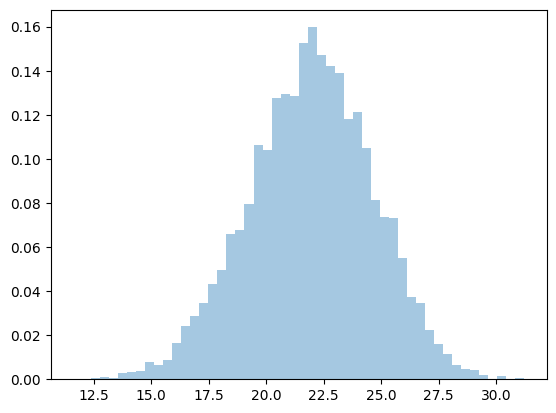

In [34]:
ax = sns.distplot(logarithm, kde = False, norm_hist=True)  

Оценим дисперсию и среднее по выборке и нарисуем поверх этого графика нормальное распределение с такими параметрами.

In [28]:
mean = np.mean(logarithm)
std = np.std(logarithm)

/var/folders/62/5kgnrj396cv9s3jb1nr9_mj40000gn/T/ipykernel_91350/1737856565.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(logarithm, kde = False, norm_hist=True)


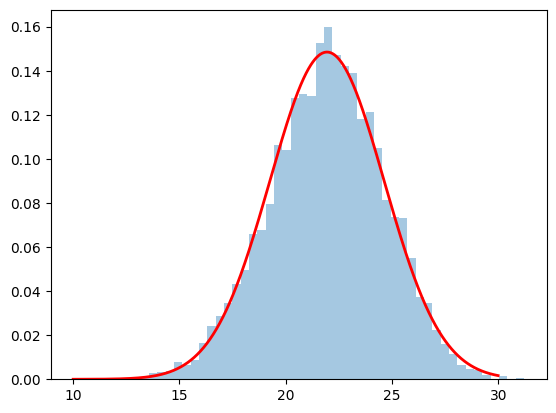

In [29]:
xx = np.arange(10, 30, 0.01)                                                   
yy = norm(loc=mean,scale=std).pdf(xx)   
ax = sns.distplot(logarithm, kde = False, norm_hist=True)  
nrm = ax.plot(xx, yy, 'r', lw=2)  

На мой взгляд, совпадение отличное :) Любители вычислять свойства случайных величин имеют возможность доказать проиллюстрированную нами мультипликативную ЦПТ с помощью ручки и бумаги :)

А что будет если теперь посмотреть на первые цифры полученных нами произведений?

In [30]:
def get_first_digit(x):
    return int(str(x)[0])

/var/folders/62/5kgnrj396cv9s3jb1nr9_mj40000gn/T/ipykernel_91350/3831611421.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(first_digits, kde = False)


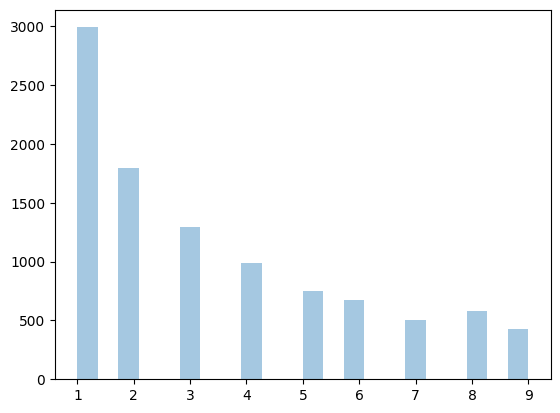

In [31]:
first_digits = list(map(get_first_digit,multiplications))
ax = sns.distplot(first_digits, kde = False)  

In [32]:
Counter(first_digits)[1]/len(first_digits)

0.2991

In [2]:
import numpy as np

In [10]:
from collections import Counter

In [12]:
x = range(1,51)


Counter([''.join(map(str,np.random.choice(x, size = (5), replace = False)))[0] for _ in range(10000)])

Counter({'4': 2243,
         '3': 2196,
         '1': 2195,
         '2': 2167,
         '5': 383,
         '7': 217,
         '8': 206,
         '9': 200,
         '6': 193})

# Бутстреп 

In [24]:
import matplotlib.pyplot as plt

In [14]:
ps = [1,2,3,4,5,6]

In [17]:
sample = np.random.choice(ps, size = 1000, replace = True)

In [22]:
means = np.random.choice(sample, size = (1000,1000), replace = True).mean(axis = 0)

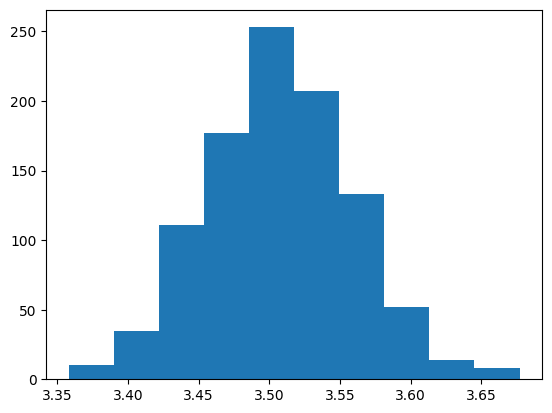

In [25]:
_ = plt.hist(means)

In [30]:
np.percentile(means, [2.5,97.5])

array([3.405975, 3.610025])

In [35]:
log_sample = np.exp(np.random.normal(1,2, size = 1000))

In [36]:
np.exp(1)

2.718281828459045

In [37]:
medians = np.median(np.random.choice(log_sample, size = (1000,1000), replace = True), axis = 0)

In [38]:
np.percentile(medians, [2.5,97.5])

array([2.37011249, 3.23619878])

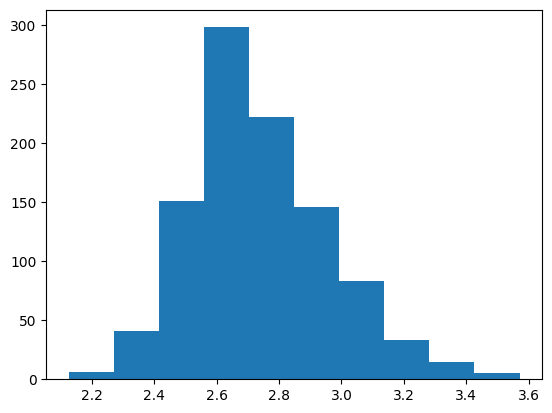

In [40]:
_ = plt.hist(medians)

# Про ЦПТ

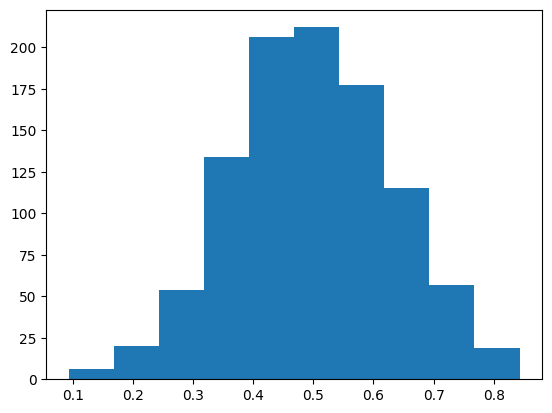

In [49]:
_ = plt.hist(np.random.uniform(size = (5,1000)).mean(axis = 0))

In [ ]:
_ = plt.hist(np.random.uniform(size = (5,1000)).mean(axis = 0))

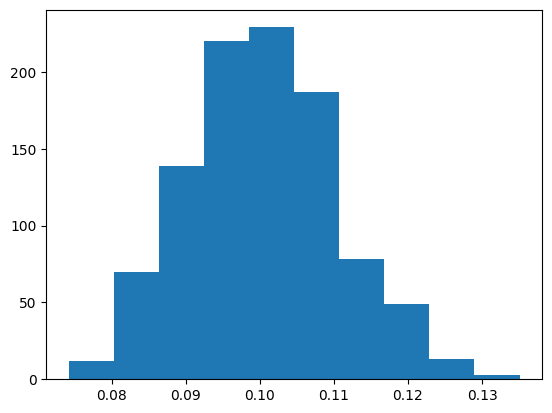

In [56]:
_ = plt.hist(np.random.exponential(1/10, size = (100,1000)).mean(axis = 0))

Кажется, мы отлично попали в оценку, данную законом Бенфорда :)

In [62]:
x1 = np.random.normal(2,3, size = 10000)
x2 = np.random.normal(1,4, size = 10000)

x3 = np.random.normal(1,5, size = 10000)

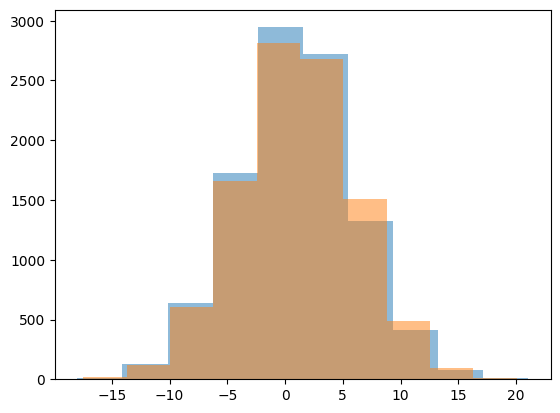

In [64]:
_ = plt.hist(x3, alpha = 0.5)
_ = plt.hist(x1-x2, alpha = 0.5)
